In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os

2023-12-28 14:27:20.644946: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-28 14:27:21.460754: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def checkfilepath(filepath):
    return os.path.exists(filepath)

def read_nifti_file(filepath):
    scan = nib.load(filepath)
    data = scan.get_fdata()
    return data

def normalize(volume):
    dmin = np.amin(volume)
    dmax = np.amax(volume)
    davg = np.average(volume)
    volume = (volume-dmin)/davg
    return volume

def process_scan(path):
    vol = read_nifti_file(path)
    vol = normalize(vol)
    return vol


In [3]:
df = pd.read_excel('/lfs1/ashaji/Imputation_Problem/data/ADNI_final.xlsx', engine='openpyxl')
df['SubjID'].replace('',np.nan,inplace=True)
df['AGE_at_scan'].replace('',np.nan,inplace=True)
df['DX'].replace('',np.nan,inplace=True)
df.dropna(subset=['SubjID','AGE_at_scan','DX'], inplace=True)
df = df.reset_index(drop=True)
df.loc[df['SEX']=='M','SEX'] = 1
df.loc[df['SEX']=='F','SEX'] = 0
df.loc[df['DX']=='CN','DX'] = 0
df.loc[df['DX']=='Dementia','DX'] = 2
df.loc[df['DX']=='MCI','DX'] = 1
df = df.sort_values(by = ['SubjID'])
df = df.reset_index(drop=True)

In [4]:
cond = [checkfilepath(str(x)) for x in df['ACCEL_DL_6DOF_2MM_T1']]
cond0 = df['ACCEL_Preprocessed for DL?']=='yes'

In [5]:
conddwi = [checkfilepath(str(x)) for x in df['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM']]

In [6]:
condt1 = [cond[i] & cond0[i]  for i in range(len(cond))]

In [7]:
df = df.reset_index(drop=True)
df.head(20)

,SubjID,RID,NONACCEL_T1_SCAN_FILENAME,NONACCEL_T1_IMAGEID,NONACCEL_Path to RAW nifti,NONACCEL_Preprocessed for DL?,NONACCEL_DL_6DOF_2MM_T1,NONACCEL_DL_6DOF_2MM_MASK,NONACCEL_DL_6DOF_2MM_GM,NONACCEL_DL_6DOF_2MM_WM,...,DWI_Matched_File_L1_Path_ENIGMATBSSspace,DWI_Matched_File_MD_Path_ENIGMATBSSspace,DWI_Matched_File_RD_Path_ENIGMATBSSspace,T1_Path_ENIGMATBSSspace,DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM,DWI_Matched_File_L1_Path_ENIGMATBSSspace_2MM,DWI_Matched_File_MD_Path_ENIGMATBSSspace_2MM,DWI_Matched_File_RD_Path_ENIGMATBSSspace_2MM,T1_Path_ENIGMATBSSspace_2MM,DWI Preprocessing Pipeline (old=ADNI2 - new=ADNI3)
0,002_S_0295,295,002_S_0295_20060418_A1_T1_1.5T_nonaccel_Preproc,45108.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,002_S_0295,295,002_S_0295_20061102_A1_T1_1.5T_nonaccel_Preproc,40966.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,002_S_0295,295,002_S_0295_20070525_A1_T1_1.5T_nonaccel_Preproc,64025.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,002_S_0295,295,002_S_0295_20080723_A1_T1_1.5T_nonaccel_Preproc,123685.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002_S_0295,295,002_S_0295_20090522_A1_T1_1.5T_nonaccel_Preproc,150177.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,002_S_0295,295,002_S_0295_20100513_A1_T1_1.5T_nonaccel_Preproc,291869.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,002_S_0295,295,002_S_0295_20110602_A2_T1_3T_nonaccel_Preproc,241350.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,002_S_0295,295,002_S_0295_20120510_A2_T1_3T_nonaccel_Preproc,308078.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,002_S_0413,413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/

In [8]:
import nibabel as nib
from tensorflow import keras
from tensorflow.keras import layers
import random as pyrandom
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing import image_dataset_from_directory

import nibabel as nib
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, accuracy_score, f1_score, precision_score, recall_score, auc, roc_auc_score
from sklearn.utils import class_weight
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "5"

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

/lfs1/ashaji/condawork/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Num GPUs Available:  1


In [9]:
### Hyperparameter config

init_lr = 1e-4
epochs = 50
early_stop = 100
seed = 53
drop_out = 0.5
weight_decay = 1e-4

batch_size=4
test_batch_size=4

In [10]:
os.getpid()

5570

In [11]:
def getCNN(width = 91,height = 109, depth = 91):
    
    def conv_block(inp,filt,name):
        inp = tf.keras.layers.Conv3D(filt,3,strides=1,padding='same')(inp)
        inp = tfa.layers.InstanceNormalization(center=False,scale=False)(inp)
        inp = tf.keras.layers.MaxPooling3D(2,strides=2,padding = 'valid')(inp)
        inp = tf.nn.relu(inp)
        return inp
    
    img0 = tf.keras.Input((91,109,91,1),name='inp0')
    inp0 = conv_block(img0,32,'conv_block1')
    inp0 = conv_block(inp0,64,'conv_block2')
    inp0 = conv_block(inp0,128,'conv_block3')
    inp0 = conv_block(inp0,256,'conv_block4')
    inp0 = conv_block(inp0,256,'conv_block5')
    
    ##LAST LAYER
    
    inp0 = tf.keras.layers.Conv3D(64,1,strides=1,padding='same')(inp0)
    inp0 = tfa.layers.InstanceNormalization(center=False,scale=False)(inp0)
    inp0 = tf.nn.relu(inp0)
    inp0 = tf.keras.layers.AveragePooling3D(2,2,'valid')(inp0)
    
    inp0 = tf.keras.layers.Dropout(rate=0.2,name='drop0')(inp0)
    
#     out0 = tf.keras.layers.Conv3D(1,1,strides=1,name='regconv1')(inp0)
    out0 = tf.keras.layers.Flatten(name='flatten1')(inp0)
    
    ######################
    
    img1 = tf.keras.Input((91,109,91,1),name='inp1')
    inp1 = conv_block(img1,32,'conv_block11')
    inp1 = conv_block(inp1,64,'conv_block12')
    inp1 = conv_block(inp1,128,'conv_block13')
    inp1 = conv_block(inp1,256,'conv_block14')
    inp1 = conv_block(inp1,256,'conv_block15')
    
    ##LAST LAYER
    
    inp1 = tf.keras.layers.Conv3D(64,1,strides=1,padding='same')(inp1)
    inp1 = tfa.layers.InstanceNormalization(center=False,scale=False)(inp1)
    inp1 = tf.nn.relu(inp1)
    inp1 = tf.keras.layers.AveragePooling3D(2,2,'valid')(inp1)
    
    inp1 = tf.keras.layers.Dropout(rate=0.2,name='drop2')(inp1)
    
#     out1 = tf.keras.layers.Conv3D(1,1,strides=1,name='regconv2')(inp1)
    out1 = tf.keras.layers.Flatten(name='flatten2')(inp1)
    
    concat = tf.keras.layers.Concatenate()([out0,out1])
    outx = tf.keras.layers.Dense(64,activation='relu')(concat) 
    outx = tf.keras.layers.Dense(32,activation='relu')(outx) 
    outx = tf.keras.layers.Dense(16,activation='relu')(outx) 
    out2 = tf.keras.layers.Dense(units=3,activation ='softmax', name='DX')(outx)
    
    model = keras.Model([img0,img1],out2,name='3DCNN_Metis_T1andDWI')
    return model

model = getCNN()
model.summary()
    

2023-12-28 14:28:47.421901: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10534 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:0d:00.0, compute capability: 6.1


Model: "3DCNN_Metis_T1andDWI"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inp0 (InputLayer)              [(None, 91, 109, 91  0           []                               
                                , 1)]                                                             
                                                                                                  
 inp1 (InputLayer)              [(None, 91, 109, 91  0           []                               
                                , 1)]                                                             
                                                                                                  
 conv3d (Conv3D)                (None, 91, 109, 91,  896         ['inp0[0][0]']                   
                                 32)                                           

                                                                                                  
 conv3d_9 (Conv3D)              (None, 11, 13, 11,   884992      ['tf.nn.relu_8[0][0]']           
                                256)                                                              
                                                                                                  
 instance_normalization_3 (Inst  (None, 11, 13, 11,   0          ['conv3d_3[0][0]']               
 anceNormalization)             256)                                                              
                                                                                                  
 instance_normalization_9 (Inst  (None, 11, 13, 11,   0          ['conv3d_9[0][0]']               
 anceNormalization)             256)                                                              
                                                                                                  
 max_pooli

 dense_2 (Dense)                (None, 16)           528         ['dense_1[0][0]']                
                                                                                                  
 DX (Dense)                     (None, 3)            51          ['dense_2[0][0]']                
                                                                                                  
Total params: 5,908,387
Trainable params: 5,908,387
Non-trainable params: 0
__________________________________________________________________________________________________


In [12]:
t1dwi = df.loc[[(condt1[i] and conddwi[i]) for i in range(len(condt1))]  , :]

In [13]:
len(t1dwi)

916

In [14]:
p = (np.ceil(0.7*len(t1dwi))-1).astype(int)
q = (np.ceil(0.9*len(t1dwi))-2).astype(int)
r = len(t1dwi)
train = t1dwi[:p]
test  = t1dwi[p:q]
val   = t1dwi[q:]
len(train), len(test), len(val)

(641, 182, 93)

In [17]:
for i in train['SubjID']:
    for j in val['SubjID']:
        if i==j:
            print(i)

<Axes: xlabel='DX', ylabel='Count'>

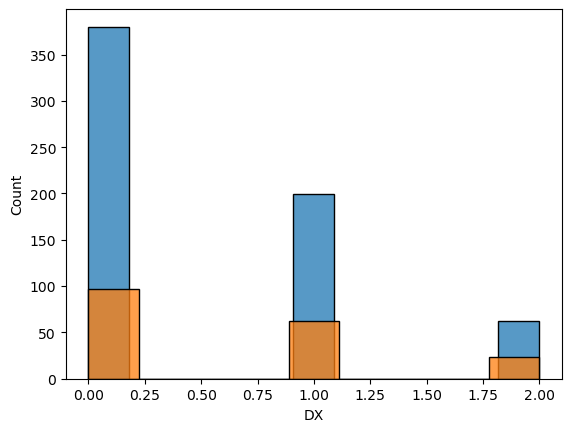

In [19]:
import seaborn as sns
sns.histplot(data=train.DX)
sns.histplot(data=test.DX)

In [20]:
class DataGenerator(tf.keras.utils.Sequence):
    def rotate(self,vol):
        def scipy_rotate(vol):
            angles = [-20,-10,-5,0,5,10,20]
            angle = pyrandom.choice(angles)
            vol = ndimage.rotate(vol,angle,reshape=False)
            vol[vol<0] = 0
            vol[vol>1] = 1
            return vol
        aug_vol = tf.numpy_function(scipy_rotate,[vol],tf.float32)
        return aug_vol

    def preprocessing(self,vol):
        if(self.isTrain):
            vol1 = self.rotate(vol)
            vol1 = tf.expand_dims(vol1,axis=3)
        else:
            vol1 = tf.expand_dims(vol,axis=3)
        return vol1
    
    def read_scan(self,path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        min = np.amax(volume)
        max = np.amin(volume)
        volume = (volume - min) / (max - min)
        volume = volume.astype("float32")
        return volume

    def __init__(self,data, batch_size, sample_weights=None,isTrain=True):
        self.data = data
        self.batch_size = batch_size
        self.sample_weights = sample_weights
        self.isTrain = isTrain

    def __len__(self):
        return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)

    def __getitem__(self, idx):
        ####
        t1  = self.data['ACCEL_DL_6DOF_2MM_T1'].tolist()
        dwi = self.data['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM'].tolist()
        labels = self.data['DX']
        labels = keras.utils.to_categorical(labels)
        
        batch_t1 = t1[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_dwi = dwi[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_y = labels[idx * self.batch_size: (idx + 1) * self.batch_size]
        
        t1_imgs = np.asarray([self.preprocessing(self.read_scan(path)) for path in batch_t1])
        dwi_imgs = np.asarray([self.preprocessing(self.read_scan(path)) for path in batch_dwi])
        ####
        return ([t1_imgs,dwi_imgs], np.array(batch_y))
    
    def on_epoch_end(self):
        if(self.isTrain):
            self.data = self.data.sample(frac=1)

In [21]:
dg_train = DataGenerator(train,batch_size,isTrain=True)
dg_val = DataGenerator(val,batch_size,isTrain=False)

In [22]:
dg_testall = DataGenerator(test,4,isTrain=False)

In [23]:
the_metrics=[tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name="Precision"), tf.keras.metrics.Recall(name="Recall"),tf.keras.metrics.CategoricalAccuracy(name="categorical_accuracy")]
model.compile(
    loss='categorical_crossentropy',
    optimizer = keras.optimizers.AdamW(learning_rate=1e-3,weight_decay=1e-4),
    metrics = the_metrics   
)

early = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 20, verbose = 1, restore_best_weights = True)

history = model.fit(
    dg_train,
    validation_data = dg_val,
    epochs = 200,
    verbose = 1,
    callbacks = [early]
)
model.save('/lfs1/ashaji/Imputation_Problem/EMBC/AD/T1andDWIwithoutImp')

/tmp/ipykernel_5570/2532890018.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


Epoch 1/200


2023-12-28 14:49:39.811995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-12-28 14:49:47.527638: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-12-28 14:49:48.790245: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7efae6400cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-28 14:49:48.790312: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2023-12-28 14:49:48.799044: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-28 14:49:49.

161/161 [==============================] - ETA: 0s - loss: 0.9610 - auc: 0.7233 - Precision: 0.5813 - Recall: 0.4072 - categorical_accuracy: 0.5725

2023-12-28 14:54:22.680749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


161/161 [==============================] - 296s 2s/step - loss: 0.9610 - auc: 0.7233 - Precision: 0.5813 - Recall: 0.4072 - categorical_accuracy: 0.5725 - val_loss: 0.8927 - val_auc: 0.7630 - val_Precision: 0.5914 - val_Recall: 0.5914 - val_categorical_accuracy: 0.5914
Epoch 2/200
161/161 [==============================] - 249s 2s/step - loss: 0.9114 - auc: 0.7432 - Precision: 0.5950 - Recall: 0.5913 - categorical_accuracy: 0.5928 - val_loss: 0.8750 - val_auc: 0.7853 - val_Precision: 0.5914 - val_Recall: 0.5914 - val_categorical_accuracy: 0.5914
Epoch 3/200
161/161 [==============================] - 252s 2s/step - loss: 0.9066 - auc: 0.7512 - Precision: 0.5943 - Recall: 0.5554 - categorical_accuracy: 0.5928 - val_loss: 0.8578 - val_auc: 0.7873 - val_Precision: 0.5914 - val_Recall: 0.5914 - val_categorical_accuracy: 0.5914
Epoch 4/200
161/161 [==============================] - 250s 2s/step - loss: 0.9057 - auc: 0.7512 - Precision: 0.5911 - Recall: 0.5772 - categorical_accuracy: 0.5928 -

161/161 [==============================] - 250s 2s/step - loss: 0.8203 - auc: 0.7983 - Precision: 0.6766 - Recall: 0.4961 - categorical_accuracy: 0.5928 - val_loss: 0.7547 - val_auc: 0.8385 - val_Precision: 0.6310 - val_Recall: 0.5699 - val_categorical_accuracy: 0.5914
Epoch 32/200
161/161 [==============================] - 252s 2s/step - loss: 0.8103 - auc: 0.8063 - Precision: 0.6881 - Recall: 0.5164 - categorical_accuracy: 0.6240 - val_loss: 0.7417 - val_auc: 0.8442 - val_Precision: 0.6310 - val_Recall: 0.5699 - val_categorical_accuracy: 0.6022
Epoch 33/200
161/161 [==============================] - 248s 2s/step - loss: 0.8164 - auc: 0.8054 - Precision: 0.6748 - Recall: 0.5148 - categorical_accuracy: 0.6100 - val_loss: 0.7617 - val_auc: 0.8439 - val_Precision: 0.7353 - val_Recall: 0.5376 - val_categorical_accuracy: 0.6452
Epoch 34/200
161/161 [==============================] - 251s 2s/step - loss: 0.7908 - auc: 0.8172 - Precision: 0.6756 - Recall: 0.5133 - categorical_accuracy: 0.616

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



161/161 [==============================] - 245s 2s/step - loss: 0.5528 - auc: 0.9126 - Precision: 0.7647 - Recall: 0.7504 - categorical_accuracy: 0.7613 - val_loss: 0.6963 - val_auc: 0.8673 - val_Precision: 0.7356 - val_Recall: 0.6882 - val_categorical_accuracy: 0.7097
Epoch 80/200
161/161 [==============================] - 245s 2s/step - loss: 0.5266 - auc: 0.9188 - Precision: 0.7911 - Recall: 0.7738 - categorical_accuracy: 0.7847 - val_loss: 0.9345 - val_auc: 0.8038 - val_Precision: 0.6087 - val_Recall: 0.6022 - val_categorical_accuracy: 0.6022
Epoch 81/200
161/161 [==============================] - 247s 2s/step - loss: 0.5271 - auc: 0.9182 - Precision: 0.7855 - Recall: 0.7598 - categorical_accuracy: 0.7800 - val_loss: 0.8076 - val_auc: 0.8424 - val_Precision: 0.6374 - val_Recall: 0.6237 - val_categorical_accuracy: 0.6344
Epoch 82/200
161/161 [==============================] - 246s 2s/step - loss: 0.5314 - auc: 0.9173 - Precision: 0.7785 - Recall: 0.7566 - categorical_accuracy: 0.762

2023-12-28 20:51:15.799264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-12-28 20:51:15.808876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-12-28 20:51:17.821198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2

INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/AD/T1andDWIwithoutImp/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/AD/T1andDWIwithoutImp/assets


In [38]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/ISBI/AD/final_models/T1andDWIwithoutImp')

In [78]:
model.evaluate(dg_testall)

/tmp/ipykernel_14207/2532890018.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)
2023-11-12 12:20:16.929556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


39/39 [==============================] - 21s 529ms/step - loss: 0.8686 - auc: 0.7757 - Precision: 0.5874 - Recall: 0.5419 - categorical_accuracy: 0.5742


[0.8686206340789795,
 0.7757439613342285,
 0.5874125957489014,
 0.5419355034828186,
 0.57419353723526]

In [39]:
import sklearn.metrics as skm

In [40]:
y_true = []
y_pred = []
for img,lbl in dg_testall:
    for i in lbl:
        y_true.append(i)
    x = model.predict(img)
    for i in x:
        y_pred.append(i)

/tmp/ipykernel_28813/2532890018.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)
2023-11-16 12:34:00.237482: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


1/1 [==============================] - 1s 627ms/step


In [41]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [42]:
yt = np.argmax(y_true,1)
yp = np.argmax(y_pred,1)

In [43]:
acc = skm.accuracy_score(yt,yp)
acc

0.5741935483870968

In [44]:
bal_acc = skm.balanced_accuracy_score(yt,yp)
bal_acc

0.40657590956134065

In [45]:
mic_auc = skm.roc_auc_score(yt,y_pred,average='micro',multi_class='ovr')
mic_auc

0.7754630593132154

In [46]:
mac_auc = skm.roc_auc_score(yt,y_pred,average='macro',multi_class='ovr')
mac_auc

0.7133094044506398

In [79]:
############# IMPUTATION TECHNIQUE 0 ##################

In [180]:
class DataGeneratorImpT1(tf.keras.utils.Sequence):
    def rotate(self,vol):
        def scipy_rotate(vol):
            angles = [-20,-10,-5,0,5,10,20]
            angle = pyrandom.choice(angles)
            vol = ndimage.rotate(vol,angle,reshape=False)
            vol[vol<0] = 0
            vol[vol>1] = 1
            return vol
        aug_vol = tf.numpy_function(scipy_rotate,[vol],tf.float32)
        return aug_vol

    def preprocessing(self,vol):
        if(self.isTrain):
            vol1 = self.rotate(vol)
            vol1 = tf.expand_dims(vol1,axis=3)
        else:
            vol1 = tf.expand_dims(vol,axis=3)
        return vol1
    
    def read_scan(self,path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        min = np.amax(volume)
        max = np.amin(volume)
        volume = (volume - min) / (max - min)
        volume = volume.astype("float32")
        return volume
    
    def __len__(self):
        return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)

    def __init__(self,data, batch_size, sample_weights=None,isTrain=True):
        self.data = data
        self.batch_size = batch_size
        self.sample_weights = sample_weights
        self.isTrain = isTrain

    def __getitem__(self, idx):
        t1  = self.data['ACCEL_DL_6DOF_2MM_T1'].tolist()
        dwi = self.data['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM'].tolist()
        labels = self.data['DX']
        labels = keras.utils.to_categorical(labels)
        
        batch_t1 = t1[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_dwi = dwi[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_y = labels[idx * self.batch_size: (idx + 1) * self.batch_size]
        t1_imgs = np.asarray([self.preprocessing(self.read_scan(path)) for path in batch_t1])
        dwi = []
        for i in batch_dwi:
            if pd.isnull(i):
                dwi.append(avgMRI)
            else:
                dwi.append((self.read_scan(i)))
        dwi_imgs = np.asarray([self.preprocessing(img) for img in dwi])
        return ([t1_imgs,dwi_imgs], np.array(batch_y))
    
    def on_epoch_end(self):
        if(self.isTrain):
            self.data = self.data.sample(frac=1)

In [123]:
t1_dwi = df.loc[[(not condt1[i] and conddwi[i]) for i in range(len(condt1))] , :]
avg = [t1_dwi,trainds]
avgCN = pd.concat(avg)

In [187]:
len(avgCN)

626

In [186]:
for i in avgCN['SubjID'].drop_duplicates():
    for j in testall['SubjID'].drop_duplicates():
        if i == j:
            print(i)

In [185]:
avgCN.drop(avgCN[(avgCN['SubjID']=='141_S_1378') ].index,inplace = True)

In [188]:
def read_scan(path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        return volume
def normalize(vol):
    min = np.amax(vol)
    max = np.amin(vol)
    vol = (vol-min) / (max-min)
    vol = vol.astype('float32')
    return vol

avgMRI = np.zeros((91,109,91))

for i in avgCN['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM']:
    avgMRI += read_scan(i)
    
avgMRI = normalize(avgMRI)

In [189]:
len(trainds),len(alltrain[:p])

(609, 609)

In [134]:
t1dwi_ = df.loc[[(condt1[i] and not conddwi[i]) for i in range(len(condt1))] , :]
train1 = [t1dwi_,trainds]
train1 = pd.concat(train1)

In [135]:
len(t1dwi_)

4685

In [236]:
count = 0
arr = []
for i in train1['SubjID'].drop_duplicates():
    for j in testall['SubjID'].drop_duplicates():
        if i == j:
            arr.append(i)
            count += 1
count

0

In [205]:
for i in arr:
    train1.drop(train1[(train1['SubjID']==i) ].index,inplace = True)

In [234]:
for i in train1['SubjID'].drop_duplicates():
    for j in testall['SubjID'].drop_duplicates():
        if i == j:
            print(i)

In [206]:
len(train1)

4828

In [211]:
dg1_train = DataGeneratorImpT1(train1,batch_size)
dg_val = DataGenerator(valds,batch_size,isTrain=False)

In [212]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/ISBI/AD/final_models/T1andDWIwithoutImp')

In [225]:
filepath = '/lfs1/ashaji/Imputation_Problem/further/IMPT1andDWI/modelIMPT1andDWI-epoch{epoch:02d}-val_loss{val_loss:.2f}'
check = keras.callbacks.ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True,mode='auto')
early = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 30, verbose = 1, restore_best_weights = True)

history = model.fit(
    dg1_train,
    validation_data = dg_val,
    epochs = 300,
    verbose = 1,
    callbacks = [early]
)
model.save('/lfs1/ashaji/Imputation_Problem/ISBI/AD/final_models/XT1andDWIAvgImp')

/tmp/ipykernel_5022/2532890018.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


Epoch 1/300


/tmp/ipykernel_5022/683972216.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-11-21 15:27:48.544882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1207/1207 [==============================] - ETA: 0s - loss: 0.6772 - auc: 0.8732 - Precision: 0.7229 - Recall: 0.6607 - categorical_accuracy: 0.7065

2023-11-21 15:58:13.428116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1207/1207 [==============================] - 1841s 2s/step - loss: 0.6772 - auc: 0.8732 - Precision: 0.7229 - Recall: 0.6607 - categorical_accuracy: 0.7065 - val_loss: 0.7004 - val_auc: 0.8599 - val_Precision: 0.6803 - val_Recall: 0.6579 - val_categorical_accuracy: 0.6776
Epoch 2/300
1207/1207 [==============================] - 1854s 2s/step - loss: 0.6095 - auc: 0.8960 - Precision: 0.7492 - Recall: 0.7171 - categorical_accuracy: 0.7388 - val_loss: 0.7509 - val_auc: 0.8392 - val_Precision: 0.6597 - val_Recall: 0.6250 - val_categorical_accuracy: 0.6447
Epoch 3/300
1207/1207 [==============================] - 1826s 2s/step - loss: 0.5505 - auc: 0.9153 - Precision: 0.7759 - Recall: 0.7601 - categorical_accuracy: 0.7715 - val_loss: 0.8308 - val_auc: 0.8438 - val_Precision: 0.7007 - val_Recall: 0.6776 - val_categorical_accuracy: 0.6842
Epoch 4/300
1207/1207 [==============================] - 1815s 2s/step - loss: 0.4969 - auc: 0.9314 - Precision: 0.8068 - Recall: 0.7985 - categorical_accura

Epoch 30/300
1207/1207 [==============================] - 1749s 1s/step - loss: 0.1143 - auc: 0.9948 - Precision: 0.9616 - Recall: 0.9600 - categorical_accuracy: 0.9609 - val_loss: 1.3353 - val_auc: 0.7793 - val_Precision: 0.5772 - val_Recall: 0.5658 - val_categorical_accuracy: 0.5789
Epoch 31/300
1207/1207 [==============================] - 1728s 1s/step - loss: 0.0961 - auc: 0.9967 - Precision: 0.9660 - Recall: 0.9650 - categorical_accuracy: 0.9654 - val_loss: 2.3024 - val_auc: 0.6264 - val_Precision: 0.3826 - val_Recall: 0.3750 - val_categorical_accuracy: 0.3750
Epoch 31: early stopping


2023-11-22 07:13:51.310866: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-11-22 07:13:51.321116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-11-22 07:13:53.096332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2

INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/ISBI/AD/final_models/XT1andDWIAvgImp/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/ISBI/AD/final_models/XT1andDWIAvgImp/assets


In [224]:
model.evaluate(dg_testall)

/tmp/ipykernel_5022/2532890018.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)
2023-11-21 15:06:28.685483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


39/39 [==============================] - 17s 425ms/step - loss: 0.8081 - auc: 0.7991 - Precision: 0.6015 - Recall: 0.5161 - categorical_accuracy: 0.5613


[0.8080710768699646,
 0.7991362810134888,
 0.6015037298202515,
 0.5161290168762207,
 0.5612903237342834]

In [226]:
import sklearn.metrics as skm

In [227]:
y_true = []
y_pred = []
for img,lbl in dg_testall:
    for i in lbl:
        y_true.append(i)
    x = model.predict(img)
    for i in x:
        y_pred.append(i)

/tmp/ipykernel_5022/2532890018.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


1/1 [==============================] - 0s 51ms/step


In [228]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [229]:
yt = np.argmax(y_true,1)
yp = np.argmax(y_pred,1)

In [230]:
acc = skm.accuracy_score(yt,yp)
acc

0.6129032258064516

In [231]:
bal_acc = skm.balanced_accuracy_score(yt,yp)
bal_acc

0.534625808662423

In [232]:
mic_auc = skm.roc_auc_score(yt,y_pred,average='micro',multi_class='ovr')
mic_auc

0.8115296566077003

In [233]:
mac_auc = skm.roc_auc_score(yt,y_pred,average='macro',multi_class='ovr')
mac_auc

0.7432584926039884

In [ ]:
## IMPUTATION 2

In [ ]:
def read_scan(path):
        scan = nib.load(str(path))
        volume = scan.get_fdata()
        return volume
def normalize(vol):
    min = np.amax(vol)
    max = np.amin(vol)
    if max == 0 and min == 0:
        return vol
    vol = (vol-min) / (max-min)
    vol = vol.astype('float32')
    return vol

def avgMRI(avg):  
    avgMRI = np.zeros((91,109,91))
    if avg.empty:
        return avgMRI
    for i in avg['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM']:
        avgMRI += read_scan(i)
    return normalize(avgMRI)

avg0 = avgCN[(avgCN['AGE_at_scan'] >= 40) & (avgCN['AGE_at_scan'] < 45)]
avg1 = avgCN[(avgCN['AGE_at_scan'] >= 45) & (avgCN['AGE_at_scan'] < 50)]
avg2 = avgCN[(avgCN['AGE_at_scan'] >= 50) & (avgCN['AGE_at_scan'] < 55)]
avg3 = avgCN[(avgCN['AGE_at_scan'] >= 55) & (avgCN['AGE_at_scan'] < 60)]
avg4 = avgCN[(avgCN['AGE_at_scan'] >= 60) & (avgCN['AGE_at_scan'] < 65)]
avg5 = avgCN[(avgCN['AGE_at_scan'] >= 65) & (avgCN['AGE_at_scan'] < 70)]
avg6 = avgCN[(avgCN['AGE_at_scan'] >= 70) & (avgCN['AGE_at_scan'] < 75)]
avg7 = avgCN[(avgCN['AGE_at_scan'] >= 75) & (avgCN['AGE_at_scan'] < 80)]
avg8 = avgCN[(avgCN['AGE_at_scan'] >= 80) & (avgCN['AGE_at_scan'] < 85)]
avg9 = avgCN[(avgCN['AGE_at_scan'] >= 85) & (avgCN['AGE_at_scan'] < 90)]
avg10 = avgCN[(avgCN['AGE_at_scan'] >= 90) & (avgCN['AGE_at_scan'] < 95)]
avg11 = avgCN[(avgCN['AGE_at_scan'] >= 95) & (avgCN['AGE_at_scan'] < 100)]
avg0 = avgMRI(avg0)
avg1 = avgMRI(avg1)
avg2 = avgMRI(avg2)
avg3 = avgMRI(avg3)
avg4 = avgMRI(avg4)
avg5 = avgMRI(avg5)
avg6 = avgMRI(avg6)
avg7 = avgMRI(avg7)
avg8 = avgMRI(avg8)
avg9 = avgMRI(avg9)
avg10 = avgMRI(avg10)
avg11 = avgMRI(avg11)

In [ ]:
class DataGeneratorMRIs(tf.keras.utils.Sequence):
    def rotate(self,vol):
        def scipy_rotate(vol):
            angles = [-20,-10,-5,0,5,10,20]
            angle = pyrandom.choice(angles)
            vol = ndimage.rotate(vol,angle,reshape=False)
            vol[vol<0] = 0
            vol[vol>1] = 1
            return vol
        aug_vol = tf.numpy_function(scipy_rotate,[vol],tf.float32)
        return aug_vol

    def preprocessing(self,vol):
        vol1 = self.rotate(vol)
        vol1 = tf.expand_dims(vol1,axis=3)
        return vol1
    
    def returnAvg(self,age):
        if age>=40 and age < 45:
            return avg0
        elif age>=45 and age < 50:
            return avg1
        elif age>=50 and age < 55:
            return avg2
        elif age>=55 and age < 60:
            return avg3
        elif age>=60 and age < 65:
            return avg4
        elif age>=65 and age < 70:
            return avg5
        elif age>=70 and age < 75:
            return avg6
        elif age>=75 and age < 80:
            return avg7
        elif age>=80 and age < 85:
            return avg8
        elif age>=85 and age < 90:
            return avg9
        elif age>=90 and age < 95:
            return avg10
        elif age>=95 and age < 100:
            return avg11
        
    
    def read_scan(self,path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        min = np.amax(volume)
        max = np.amin(volume)
        volume = (volume - min) / (max - min)
        volume = volume.astype("float32")
        return volume

    def __init__(self,data, batch_size, sample_weights=None):
        self.data = data
        self.batch_size = batch_size
        self.sample_weights = sample_weights

    def __len__(self):
        return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)

    def __getitem__(self, idx):
        
        t1  = self.data['ACCEL_DL_6DOF_2MM_T1'].tolist()
        dwi = self.data['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM'].tolist()
        labels = self.data['AGE_at_scan'].astype(np.float32)
        labelsx = self.data['DX']
        labelsx = keras.utils.to_categorical(labelsx)
        
        batch_t1 = t1[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_y = labels[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_x = labelsx[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_dwi = dwi[idx * self.batch_size: (idx + 1) * self.batch_size]
        
        dwi = []
        for i in range(len(batch_dwi)):
            if pd.isnull(batch_dwi[i]):
                dwi.append(self.returnAvg(batch_y.iloc[i]))
            else:
                dwi.append((self.read_scan(batch_dwi[i])))
                
        t1_imgs = np.asarray([self.preprocessing(self.read_scan(path)) for path in batch_t1])
        dwi_imgs = np.asarray([self.preprocessing(img) for img in dwi])
        
        return ([t1_imgs,dwi_imgs], np.array(batch_x))
    
    def on_epoch_end(self):
        self.data = self.data.sample(frac=1)

In [ ]:
dg2_train = DataGeneratorMRIs(train1,batch_size)

In [50]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/ISBI/AD/final_models/T1andDWIBuckImp')

In [100]:
early = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 20, verbose = 1, restore_best_weights = True)

history = model.fit(
    dg2_train,
    validation_data = dg_val,
    epochs = 200,
    verbose = 1,
    callbacks = [early]
)
model.save('/lfs1/ashaji/Imputation_Problem/ISBI/AD/final_models/T1andDWIBuckImpAgain0')

/tmp/ipykernel_30762/2532890018.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


Epoch 1/200


/tmp/ipykernel_30762/2577338316.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)
2023-11-19 02:54:08.091085: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1324/1324 [==============================] - ETA: 0s - loss: 0.3277 - auc: 0.9682 - Precision: 0.8821 - Recall: 0.8806 - categorical_accuracy: 0.8819

2023-11-19 03:32:07.101831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1324/1324 [==============================] - 2306s 2s/step - loss: 0.3277 - auc: 0.9682 - Precision: 0.8821 - Recall: 0.8806 - categorical_accuracy: 0.8819 - val_loss: 0.7085 - val_auc: 0.8853 - val_Precision: 0.7267 - val_Recall: 0.7171 - val_categorical_accuracy: 0.7171
Epoch 2/200
1324/1324 [==============================] - 1923s 1s/step - loss: 0.2915 - auc: 0.9746 - Precision: 0.8971 - Recall: 0.8961 - categorical_accuracy: 0.8969 - val_loss: 0.7390 - val_auc: 0.8893 - val_Precision: 0.7434 - val_Recall: 0.7434 - val_categorical_accuracy: 0.7434
Epoch 3/200
1324/1324 [==============================] - 1928s 1s/step - loss: 0.2602 - auc: 0.9789 - Precision: 0.9073 - Recall: 0.9063 - categorical_accuracy: 0.9069 - val_loss: 0.8999 - val_auc: 0.8724 - val_Precision: 0.7105 - val_Recall: 0.7105 - val_categorical_accuracy: 0.7105
Epoch 4/200
1324/1324 [==============================] - 1923s 1s/step - loss: 0.2545 - auc: 0.9795 - Precision: 0.9108 - Recall: 0.9103 - categorical_accura

2023-11-19 16:10:52.467798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-11-19 16:10:52.488724: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-11-19 16:10:54.521056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2

INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/ISBI/AD/final_models/T1andDWIBuckImpAgain0/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/ISBI/AD/final_models/T1andDWIBuckImpAgain0/assets


In [75]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/ISBI/AD/final_models/T1andDWIBuckImpAgain')

In [76]:
import sklearn.metrics as skm

In [77]:
y_true = []
y_pred = []
for img,lbl in dg_testall:
    for i in lbl:
        y_true.append(i)
    x = model.predict(img)
    for i in x:
        y_pred.append(i)

/tmp/ipykernel_5022/2532890018.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


1/1 [==============================] - 1s 635ms/step


In [78]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [79]:
yt = np.argmax(y_true,1)
yp = np.argmax(y_pred,1)

In [80]:
acc = skm.accuracy_score(yt,yp)
acc

0.7870967741935484

In [81]:
bal_acc = skm.balanced_accuracy_score(yt,yp)
bal_acc

0.7577975998864671

In [82]:
mic_auc = skm.roc_auc_score(yt,y_pred,average='micro',multi_class='ovr')
mic_auc

0.9187513007284079

In [83]:
mac_auc = skm.roc_auc_score(yt,y_pred,average='macro',multi_class='ovr')
mac_auc

0.9053097592957201

In [40]:
## IMPUTATION 3